In [4]:
import numpy as np
from pandas  import DataFrame, Series
import matplotlib.pyplot as plt

import re
from datetime import timedelta, datetime

In [5]:
import pandas as pd 
pd.options.display.max_columns = 50

In [52]:
import subprocess

root = "/Users/Lam/Downloads/awslog/2019/06/30/"

# source = "s3://log.api2-server.n-kishou.co.jp/AWSLogs/406671585377/elasticloadbalancing/ap-northeast-1/2019/06/30"
# source = "s3://log.api2-server.n-kishou.co.jp/access_logs/2019/06/30"
# target = root
# subprocess.call(["aws", "s3", "cp", source, target, "--recursive"])


In [53]:
# import os
# command = "cat {0}*.gz > {0}temp.log".format(root)
# print(command)
# os.system(command)

In [54]:
file_name = root + "temp.log"
lines = [line.rstrip('\n') for line in open(file_name)]

In [55]:
dt_lst = []
for line in lines:
    date_str = re.search('\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}', line)
    dt_line = datetime.strptime(date_str.group(), '%Y-%m-%dT%H:%M:%S')
#     removed = date_str.group()[:-3]
#     dt_line = datetime.strptime(removed, '%Y-%m-%dT%H:%M')
    dt_lst.append(dt_line)

In [56]:
sr_dt = Series(dt_lst, name='Request_Time')
# Create a DataFrame using the Request_Time Series

df = pd.DataFrame(sr_dt)
# Create an array of 1's using Numpy
count = sr_dt.size
ones = np.ones(count, dtype=int)
# Add the ones array to the DataFrame with the header "Counts"
df['Counts'] = ones
grouped = df.groupby('Request_Time').count()

In [57]:
#80\/.*.html?

In [58]:
title = ['device_uuid','device_os','device_name','app_version']
# for i in range(len(big_result.index)):
#     url = big_result.index[i]
#     parsed = urlparse.urlparse(url)
    
#     output = []
#     for i in range(len(title)):
#         output.append("".join(urlparse.parse_qs(parsed.query)[title[i]]))
        
#     output_list.append(output)   

In [59]:
import urllib.parse as urlparse


In [60]:
dt_lst_2 = []
dt_lst_3 = []
dt_lst_4 = []
dt_lst_5 = []


pattern = 'raininfopro.html?.*HTTP'
for line in lines:
    match = re.search(pattern, line)
    if match is not None:
        sl_line = match.group().strip().replace("HTTP","")
        parsed = urlparse.urlparse(sl_line)

        device_uuid = ''.join(urlparse.parse_qs(parsed.query)[title[0]])
        device_os = ''.join(urlparse.parse_qs(parsed.query)[title[1]])
        device_name = ''.join(urlparse.parse_qs(parsed.query)[title[2]])
        app_version = ''.join(urlparse.parse_qs(parsed.query)[title[3]])

        dt_lst_2.append(device_uuid)
        dt_lst_3.append(device_os)
        dt_lst_4.append(device_name)
        dt_lst_5.append(app_version)


#         dt_lst_2.append(sl_line)


In [61]:
# import urllib.parse as urlparse

# for line in  lines:
#     url = re.search('http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',line)
#     parsed = urlparse.urlparse(url.group(0))
# #     print(parsed)
#     print(''.join(urlparse.parse_qs(parsed.query)['ser']))

In [62]:
global count, grouped
    # Create a Series named "Request_Time"
sr_dt = Series(dt_lst, name='Request_Time')
# Create a DataFrame using the Request_Time Series
df = DataFrame(sr_dt)
# Create an array of 1's using Numpy
# count = sr_dt.size
# ones = np.ones(count, dtype=int)
# Add the ones array to the DataFrame with the header "Counts"
# df['Counts'] = ones

df['device_uuid'] = Series(dt_lst_2, name='device_uuid')
df['device_os'] = Series(dt_lst_3, name='device_os')
df['device_name'] = Series(dt_lst_4, name='device_name')
df['app_version'] = Series(dt_lst_5, name='app_version')

display(df)

,Request_Time,device_uuid,device_os,device_name,app_version
0,2019-06-30 00:00:00,2a434b6509047ece,9,KDDI_SCV38,5.2
1,2019-06-30 00:00:00,BH900T6GD0,9,KDDI_SOV37,5.2
2,2019-06-30 00:00:00,353006080262736,8.0.0,KDDI_SHV39,5.2
3,2019-06-30 00:00:00,LGV33e88705f,7.0,KDDI_LGV33,5.2
4,2019-06-30 00:00:00,5FG7N18109000868,8.0.0,HUAWEI_HWV31,5.2
5,2019-06-30 00:00:00,353021084230605,8.0.0,KDDI_SHV40,5.2
6,2019-06-30 00:00:01,BH905CRY99,8.0.0,KDDI_SOV36,5.2
7,2019-06-30 00:00:01,3JQ7N18518000776,8.0.0,HUAWEI_HWV32,5.2
8,2019-06-30 00:00:01,LGV34dc5d74c8,7.0,KDDI_LGV34,5.2
9,2019-06-30 00:00:01,353492090390354,9,KDDI_SHV42,5.2


In [63]:
# from IPython.display import display, HTML

# filter_date = (df['Request_Time'] > '2019-06-27 05:00:00') & (df['Request_Time'] <= '2019-06-27 09:00:00')
# result = df.loc[filter_date].groupby('Service').count().sort_values(['Counts'],ascending=False).head(3)
# display(result)

# display(df)

In [66]:
# result = df.groupby(['Request_Time','device_name']).count().sort_values('device_uuid',ascending=False)
result = df.groupby(['Request_Time','device_name']).size().reset_index(name='counts').sort_values(['counts','device_name'],ascending=False)
display(result)


,Request_Time,device_name,counts
294285,2019-06-30 09:30:27,KYOCERA_KYV43,28
293594,2019-06-30 09:29:03,KYOCERA_KYV43,26
293112,2019-06-30 09:27:59,KYOCERA_KYV43,23
293489,2019-06-30 09:28:49,KYOCERA_KYV43,22
294790,2019-06-30 09:31:23,KYOCERA_KYV43,22
294899,2019-06-30 09:31:36,KYOCERA_KYV43,22
293718,2019-06-30 09:29:19,KYOCERA_KYV43,20
293377,2019-06-30 09:28:35,KYOCERA_KYV43,19
293921,2019-06-30 09:29:45,KYOCERA_KYV43,19
294420,2019-06-30 09:30:41,KYOCERA_KYV43,17


In [65]:
result = df.groupby(['Request_Time','device_name'], as_index=False).agg({'device_uuid':'count'}).sort_values(['device_uuid'],ascending=False)
display(result)
# display(result.rename(columns={'device_name': 'c'}, inplace=True))

,Request_Time,device_name,device_uuid
294285,2019-06-30 09:30:27,KYOCERA_KYV43,28
293594,2019-06-30 09:29:03,KYOCERA_KYV43,26
293112,2019-06-30 09:27:59,KYOCERA_KYV43,23
294899,2019-06-30 09:31:36,KYOCERA_KYV43,22
294790,2019-06-30 09:31:23,KYOCERA_KYV43,22
293489,2019-06-30 09:28:49,KYOCERA_KYV43,22
293718,2019-06-30 09:29:19,KYOCERA_KYV43,20
293921,2019-06-30 09:29:45,KYOCERA_KYV43,19
293377,2019-06-30 09:28:35,KYOCERA_KYV43,19
294420,2019-06-30 09:30:41,KYOCERA_KYV43,17


In [ ]:
#### from IPython.display import display, HTML
result = df.groupby('Service').count().sort_values(['Counts'],ascending=False).head(10)
display(result)
big_result = result.loc[ (result['Counts'] > 200)]
print(len(big_result.index))
display(big_result)


In [28]:
import urllib.parse as urlparse

title = ['device_uuid','device_os','device_name','app_version']

output_list = []

for i in range(len(big_result.index)):
    url = big_result.index[i]
    parsed = urlparse.urlparse(url)
    
    output = []
    for i in range(len(title)):
        output.append("".join(urlparse.parse_qs(parsed.query)[title[i]]))
        
    output_list.append(output)   
    
print(len(output_list))

print(','.join(map(str, title)))

for item in output_list:
    print(','.join(map(str, item)))
        

9
device_uuid,device_os,device_name,app_version
259708173140,6.0.1,KYOCERA_KYV38,5.1
179609415974,7.1.2,KYOCERA_KYV43,5.2
259708343301,6.0.1,KYOCERA_KYV38,5.2
356106070474684,6.0.1,KDDI_SHV35,5.2
0a4765be,6.0.1,KDDI_SCL24,5.2
259708312195,6.0.1,KYOCERA_KYV38,5.2
259708168978,6.0.1,KYOCERA_KYV38,5.2
356124070402050,6.0.1,KDDI_SHV37,5.1
259708145472,6.0.1,KYOCERA_KYV38,5.2


In [ ]:
filter_date = (df['Request_Time'] > '2019-06-27 05:00:00') & (df['Request_Time'] <= '2019-06-27 09:00:00')
result = df.loc[filter_date].groupby('Service').count().sort_values(['Counts'],ascending=False).head(3)
# print(result.index[0])



In [54]:
# link_name = 'raininfopro.html?os=Android&device_os=6.0.1&device_name=KYOCERA_KYV38&app_version=5.1&device_uuid=259708173140&pa=nkishou&device_token=c8VvROrkRcQ%3AAPA91bEzTqtQAQV99mPp80DEvMCbTaUUzlG_cND3EBawwo5pl8kT1wDVLRdqG5hNQdnIqUiSFysrktYwypYl6U1tvgZHTpjJXp91zvDdFkdFrRVctif22zn8cl6hCybxuTjCH9Yu_t_1&entity=start_up&service_type=ausp&aups=1&rainalert_starttime=0000&rainalert_endtime=2400&rainalert_enabled=1&area_code=0&lat=35.7204979&lon=140.1599286'
mask = (df['Request_Time'] > '2019-06-27 05:00:00') & (df['Request_Time'] <= '2019-06-27 09:00:00') & (df['Service'] == result.index[0])
df.loc[mask].groupby('Request_Time').count().sort_values(['Counts'],ascending=False)

,Counts,Service
Request_Time,,
2019-06-27 07:15:29,7,7
2019-06-27 07:52:16,6,6
2019-06-27 07:17:25,6,6
2019-06-27 07:33:07,6,6
2019-06-27 07:12:41,5,5
2019-06-27 06:42:41,5,5
2019-06-27 07:48:43,4,4
2019-06-27 07:27:55,4,4
2019-06-27 06:58:58,4,4


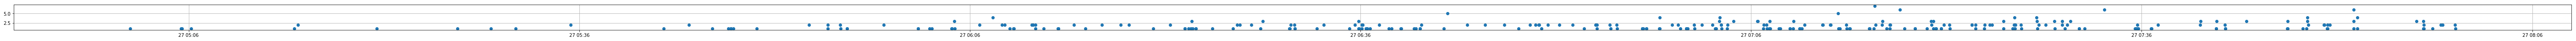

In [55]:
result = df.loc[mask].groupby('Request_Time').count()
# result.index
plt.plot_date(result.index,result['Counts'])
plt.grid(True)
plt.rcParams["figure.figsize"] = (100,1)
plt.show()